In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [6]:
data_link = "/Users/maxkucher/preprocessing/mlops/car_prices/car_data.csv"
data = pd.read_csv(data_link)
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [7]:
len(data["CarName"].unique())

147

In [8]:
def null_values(data: pd.DataFrame, column: str) -> str:
    return f"column {column} has {data[column].isnull().sum()} null values."
    

In [9]:
for column in data.columns:
    print(null_values(data, column))

column car_ID has 0 null values.
column symboling has 0 null values.
column CarName has 0 null values.
column fueltype has 0 null values.
column aspiration has 0 null values.
column doornumber has 0 null values.
column carbody has 0 null values.
column drivewheel has 0 null values.
column enginelocation has 0 null values.
column wheelbase has 0 null values.
column carlength has 0 null values.
column carwidth has 0 null values.
column carheight has 0 null values.
column curbweight has 0 null values.
column enginetype has 0 null values.
column cylindernumber has 0 null values.
column enginesize has 0 null values.
column fuelsystem has 0 null values.
column boreratio has 0 null values.
column stroke has 0 null values.
column compressionratio has 0 null values.
column horsepower has 0 null values.
column peakrpm has 0 null values.
column citympg has 0 null values.
column highwaympg has 0 null values.
column price has 0 null values.


In [10]:
def uniaue_values(data: pd.DataFrame, column: str) -> str:
    return f"column {column} has {len(data[column].unique())} unique values"


In [11]:
for column in data.columns:
    print(uniaue_values(data, column))

column car_ID has 205 unique values
column symboling has 6 unique values
column CarName has 147 unique values
column fueltype has 2 unique values
column aspiration has 2 unique values
column doornumber has 2 unique values
column carbody has 5 unique values
column drivewheel has 3 unique values
column enginelocation has 2 unique values
column wheelbase has 53 unique values
column carlength has 75 unique values
column carwidth has 44 unique values
column carheight has 49 unique values
column curbweight has 171 unique values
column enginetype has 7 unique values
column cylindernumber has 7 unique values
column enginesize has 44 unique values
column fuelsystem has 8 unique values
column boreratio has 38 unique values
column stroke has 37 unique values
column compressionratio has 32 unique values
column horsepower has 59 unique values
column peakrpm has 23 unique values
column citympg has 29 unique values
column highwaympg has 30 unique values
column price has 189 unique values


In [12]:
upd_data = data.drop(["car_ID", "CarName"], axis="columns")
upd_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [13]:
data["fuelsystem"].unique()

array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
      dtype=object)

In [14]:
upd_data.replace({"fueltype": {"gas": 0, "diesel": 1}}, inplace=True)
upd_data.replace({"doornumber": {"two": 0, "four": 1}}, inplace=True)
upd_data.replace({"aspiration": {"std": 0, "turbo": 1}}, inplace=True)
upd_data.replace({"carbody": {"convertible": 0, "hatchback": 1, "sedan": 2, "wagon": 3, "hardtop": 4}}, inplace=True)
upd_data.replace({"drivewheel": {"rwd": 0, "fwd": 1, "4wd": 2}}, inplace=True)
upd_data.replace({"enginelocation": {"front": 0, "rear": 1}}, inplace=True)
upd_data.replace({"enginetype": {"dohc": 0, "ohcv": 1, "ohc": 2, "l": 3, "rotor": 4, "ohcf": 5, "dohcv": 6}}, inplace=True)
upd_data.replace({"cylindernumber": {"four": 0, "six": 1, "five": 2, "three": 3, "twelve": 4, "two": 5, "eight": 6}}, inplace=True)
upd_data.replace({"fuelsystem": {"mpfi": 0, "2bbl": 1, "mfi": 2, "1bbl": 3, "spfi": 4, "4bbl": 5, "idi": 6, "spdi": 7}}, inplace=True)


/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_88729/2436525092.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  upd_data.replace({"fueltype": {"gas": 0, "diesel": 1}}, inplace=True)
/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_88729/2436525092.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  upd_data.replace({"doornumber": {"two": 0, "four": 1}}, inplace=True)
/var/folders/tl/sxyv3tjs7wlff0fs8dht26pr0000gn/T/ipykernel_88729/2436525092.py:3: FutureWarning: Downcasting behavior in `replace` is deprec

In [15]:
upd_data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [16]:
upd_data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,0,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,2,1,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,2,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,0,1,2,0,0,109.1,188.8,68.9,...,141,0,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,0,1,1,2,0,0,109.1,188.8,68.8,...,141,0,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,0,0,1,2,0,0,109.1,188.8,68.9,...,173,0,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,1,1,1,2,0,0,109.1,188.8,68.9,...,145,6,3.01,3.40,23.0,106,4800,26,27,22470.0


In [17]:
corr_matrix = upd_data.corr()  # по умолчанию метод Пирсона
print(corr_matrix)

                  symboling  fueltype  aspiration  doornumber   carbody  \
symboling          1.000000 -0.194311   -0.059866   -0.664073 -0.398970   
fueltype          -0.194311  1.000000    0.401397    0.191491  0.157580   
aspiration        -0.059866  0.401397    1.000000    0.031792  0.021276   
doornumber        -0.664073  0.191491    0.031792    1.000000  0.447534   
carbody           -0.398970  0.157580    0.021276    0.447534  1.000000   
drivewheel         0.041671 -0.132257   -0.066465    0.098954 -0.056886   
enginelocation     0.212471 -0.040070   -0.057191   -0.137757  0.126546   
wheelbase         -0.531954  0.308346    0.257611    0.447357  0.368772   
carlength         -0.357612  0.212679    0.234539    0.398568  0.376842   
carwidth          -0.232919  0.233880    0.300567    0.207168  0.191511   
carheight         -0.541038  0.284631    0.087311    0.552208  0.483675   
curbweight        -0.227691  0.217275    0.324902    0.197379  0.240367   
enginetype         0.0157

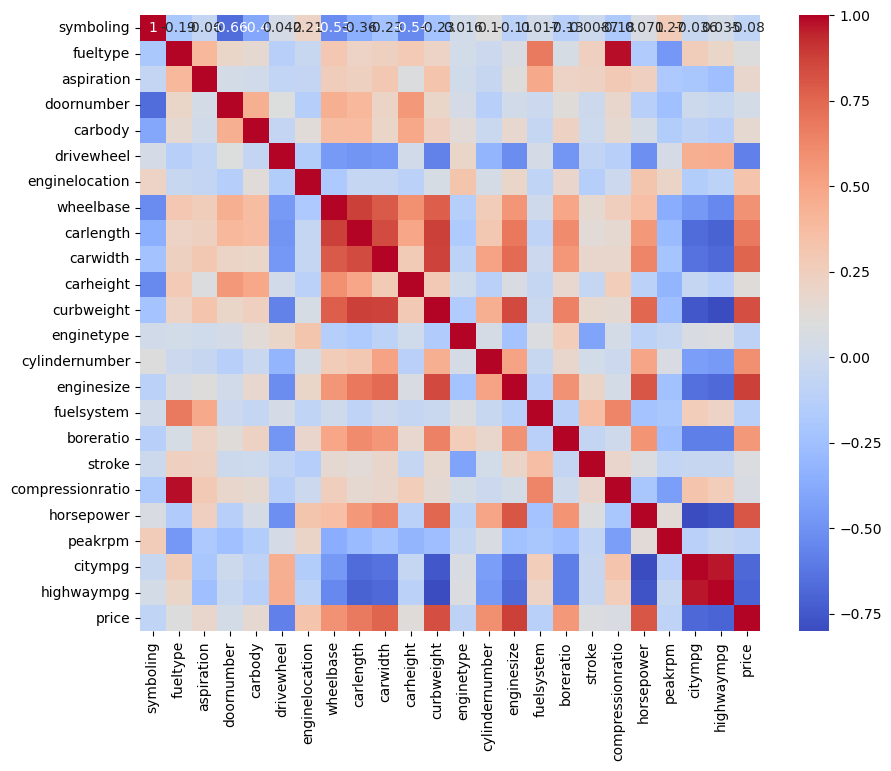

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [19]:
data["carbody"].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

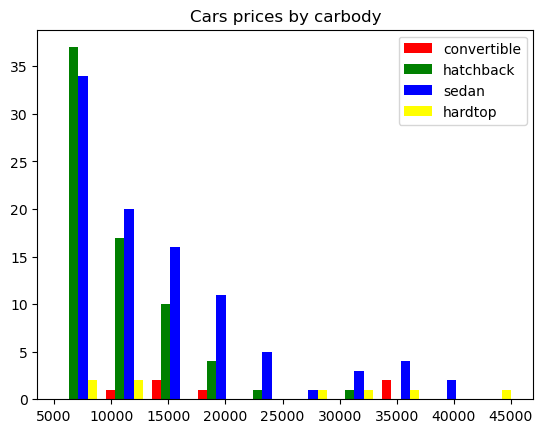

In [20]:
convs = data[data["carbody"] == "convertible"]["price"]
hatchback = data[data["carbody"] == "hatchback"]["price"]
sedan = data[data["carbody"] == "sedan"]["price"]
hardtop = data[data["carbody"] == "hardtop"]["price"]

plt.title("Cars prices by carbody")
plt.hist([convs, hatchback, sedan, hardtop], color=["red", "green", "blue", "yellow"], label=["convertible", "hatchback", "sedan", "hardtop"])
plt.legend()

In [29]:
def scatter_plot(column_name, show_trend=True):
    prices = data["price"]
    column = data[column_name]

    k, b = np.polyfit(prices, column, 1)

    # prices = k * column + b


    plt.title(f"{column_name} to price correlation")
    plt.xlabel("price")
    plt.ylabel(column_name)
    plt.scatter(prices, column, c='blue', s=50, marker='.', alpha=0.7)

    if show_trend == True:
        plt.plot(prices, k*prices+b, color="red", linewidth=2)
    plt.show()

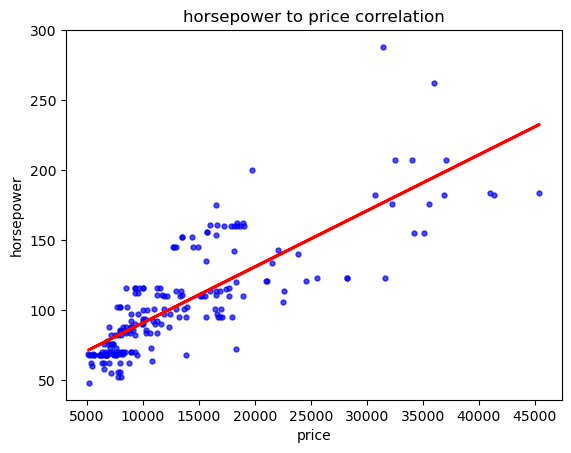

In [32]:
scatter_plot("horsepower", show_trend=True)

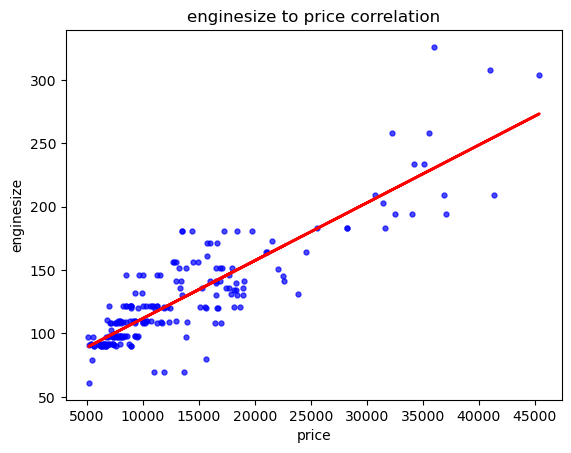

In [27]:
scatter_plot("enginesize")

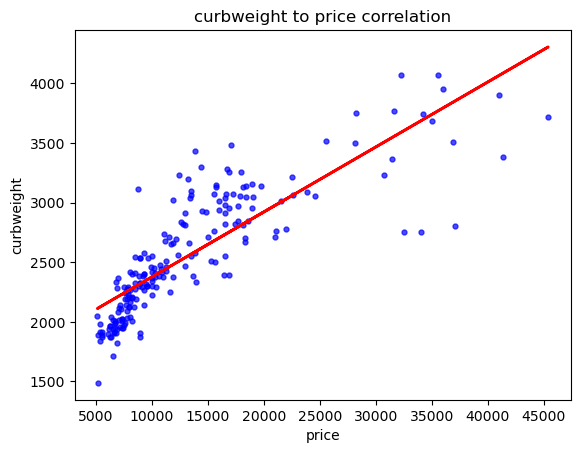

In [28]:
scatter_plot("curbweight")